In [ ]:
import joblib

model = joblib.load('models/LR-model.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'LR-model.joblib'

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preprocessing_utils as prep

new_df = pd.read_csv('idea_data_2024.csv')
new_df["timestamp"] = pd.to_datetime(new_df["timestamp"])

# Define the start and end dates for your date range
start_date = '2024-03-15'  # Your desired start date
end_date = '2024-03-16'    # Your desired end date

# Convert these dates to datetime objects for proper comparison
start_datetime = pd.to_datetime(start_date)
end_datetime = pd.to_datetime(end_date)

# Filter the DataFrame for the date range
# The .dt.date converts the timestamp to just the date part for comparison
df = new_df[
    (new_df['timestamp'].dt.date >= start_datetime.date()) & 
    (new_df['timestamp'].dt.date <= end_datetime.date())
].copy()


In [ ]:

timestamps = df['timestamp'].copy()
values = df['close']
df = prep.predict_trend(df, model)
predictions = df['pred']
predictions.value_counts()


c:\Users\Joel\projects\MarginCall\LR-model\preprocessing_utils.py:266: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = x.fillna(method='ffill').fillna(method='bfill')


pred
0.0    362
1.0     13
Name: count, dtype: int64

In [18]:
threshold_pred = df['threshold_pred']
threshold_pred.value_counts()

threshold_pred
0.0    299
1.0     76
Name: count, dtype: int64

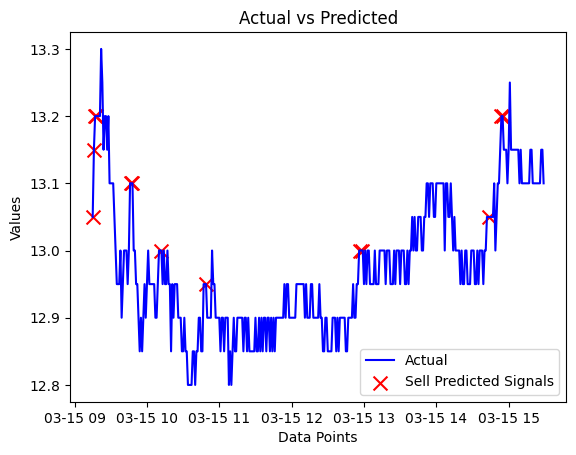

In [ ]:
# Plot the predicted values

plt.plot(timestamps, values, label='Actual', linestyle='-', color='blue')

sell_prediction_mask = predictions == 1
sell_predicted_timestamps = timestamps[sell_prediction_mask]
sell_predicted_values = values[sell_prediction_mask]

buy_prediction_mask = predictions == 0
buy_predicted_timestamps = timestamps[buy_prediction_mask]
buy_predicted_values = values[buy_prediction_mask]

plt.scatter(sell_predicted_timestamps, sell_predicted_values, 
           label='Sell Predicted Signals', 
           marker='x', 
           color="red",
           s=100)

plt.scatter(buy_predicted_timestamps, buy_predicted_values, 
           label='Buy Predicted Signals', 
           marker='x', 
           color="green",
           s=100)
# Add labels, title, and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()

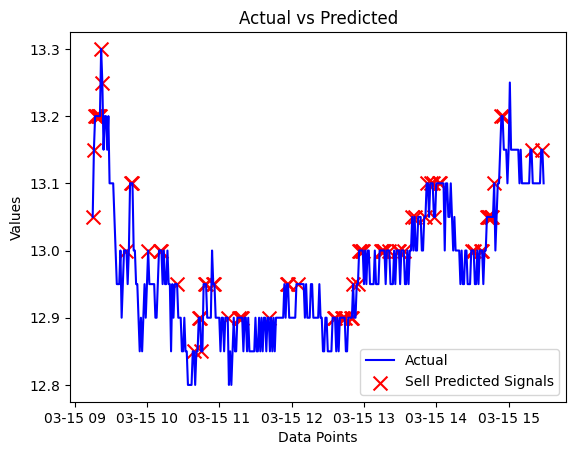

In [ ]:
# Plot the predicted values

plt.plot(timestamps, values, label='Actual', linestyle='-', color='blue')

sell_prediction_mask = threshold_pred == 1
sell_predicted_timestamps = timestamps[sell_prediction_mask]
sell_predicted_values = values[sell_prediction_mask]

buy_prediction_mask = threshold_pred == 0
buy_predicted_timestamps = timestamps[buy_prediction_mask]
buy_predicted_values = values[buy_prediction_mask]

plt.scatter(sell_predicted_timestamps, sell_predicted_values, 
           label='Sell Predicted Signals', 
           marker='x', 
           color="red",
           s=100)

plt.scatter(buy_predicted_timestamps, buy_predicted_values, 
           label='Buy Predicted Signals', 
           marker='x', 
           color="green",
           s=100)
# Add labels, title, and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()